C:\Users\Administrator\AppData\Local\Temp\ipykernel_10576\1906971579.py:9: DtypeWarning: Columns (1,4,5,6,13,14,15,16) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("metadata.csv")


   cord_uid                                       sha source_x  \
0  ug7v899j  d1aafb70c066a2068b02786f8929fd9c900897fb      PMC   
1  02tnwd4m  6b0567729c2143a66d737eb0a2f63f2dce2e5a7d      PMC   
2  ejv2xln0  06ced00a5fc04215949aa72528f2eeaae1d58927      PMC   
3  2b73a28n  348055649b6b8cf2b9a376498df9bf41f7123605      PMC   
4  9785vg6d  5f48792a5fa08bed9f56016f4981ae2ca6031b32      PMC   

                                               title                    doi  \
0  Clinical features of culture-proven Mycoplasma...  10.1186/1471-2334-1-6   
1  Nitric oxide: a pro-inflammatory mediator in l...           10.1186/rr14   
2    Surfactant protein-D and pulmonary host defense           10.1186/rr19   
3               Role of endothelin-1 in lung disease           10.1186/rr44   
4  Gene expression in epithelial cells in respons...           10.1186/rr61   

      pmcid pubmed_id license  \
0  PMC35282  11472636   no-cc   
1  PMC59543  11667967   no-cc   
2  PMC59549  11667972   no-cc

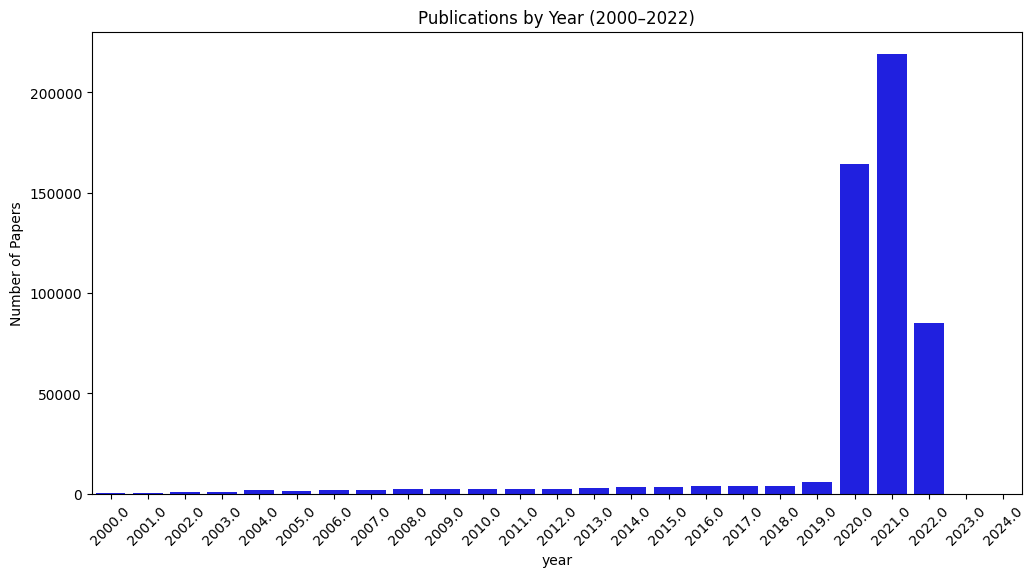

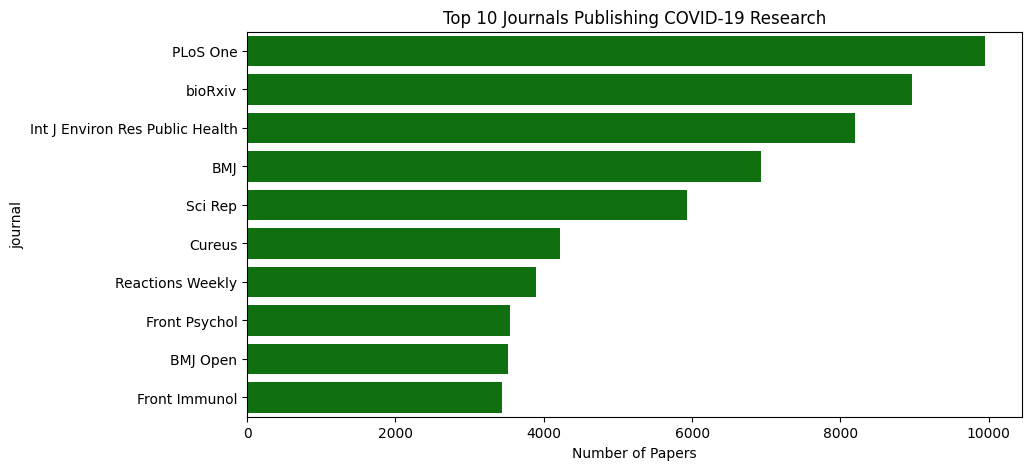

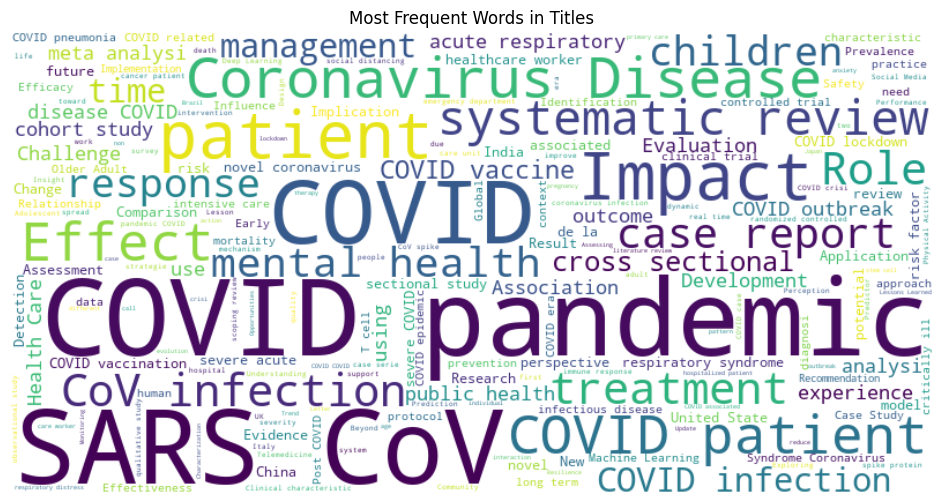

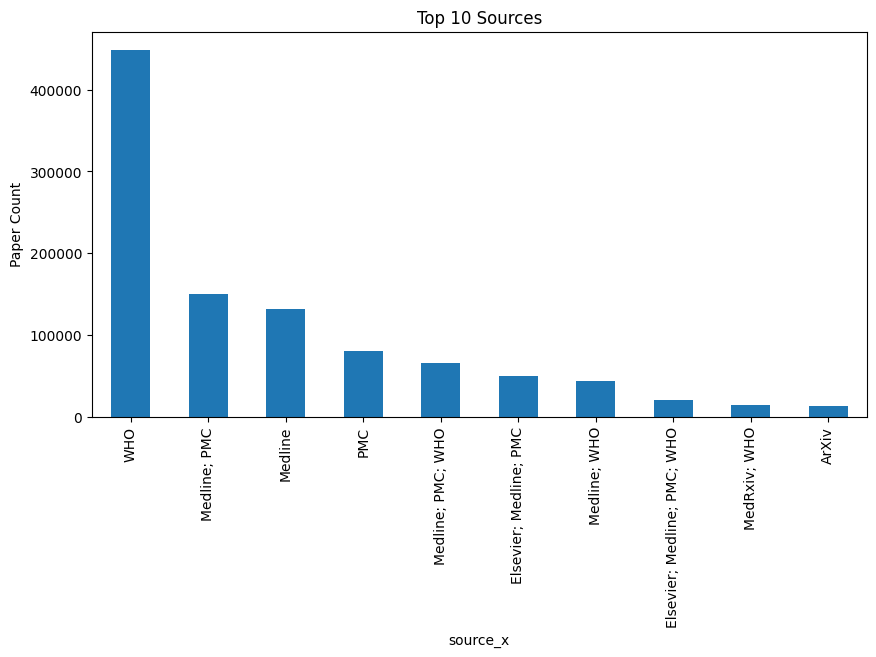

In [8]:
# Part 1: Data Loading and Basic Exploration
# Import libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud

# Load the dataset
df = pd.read_csv("metadata.csv")

# Preview first few rows
print(df.head())

# Check shape (rows, columns)
print("Shape:", df.shape)

# Data types of each column
print(df.info())

# Check missing values
print(df.isnull().sum().head(20))  # check first 20 cols

# Basic statistics for numerical columns
print(df.describe())

# Part 2: Data Cleaning and Preparation
# Identify columns with many missing values
missing = df.isnull().sum().sort_values(ascending=False)
print(missing.head(10))

# Drop or fill missing values 
df_clean = df.dropna(subset=['title', 'publish_time']).copy()

# Convert publish_time to datetime
df_clean['publish_time'] = pd.to_datetime(df_clean['publish_time'], errors='coerce')

# Extract year
df_clean['year'] = df_clean['publish_time'].dt.year

# Add abstract word count
df_clean['abstract_word_count'] = df_clean['abstract'].fillna("").apply(lambda x: len(x.split()))

print(df_clean[['title','year','abstract_word_count']].head())

# Part 3: Data Analysis and Visualization
# Count papers by year
recent_years = year_counts[year_counts.index >= 2000]
plt.figure(figsize=(12,6))
sns.barplot(x=recent_years.index, y=recent_years.values, color="blue")
plt.title("Publications by Year (2000–2022)")
plt.ylabel("Number of Papers")
plt.xticks(rotation=45)
plt.show()

# Top journals
top_journals = df_clean['journal'].value_counts().head(10)
plt.figure(figsize=(10,5))
sns.barplot(y=top_journals.index, x=top_journals.values, color="green")
plt.title("Top 10 Journals Publishing COVID-19 Research")
plt.xlabel("Number of Papers")
plt.show()

# Word frequency in titles (word cloud)
titles = " ".join(df_clean['title'].dropna())
wordcloud = WordCloud(width=800, height=400, background_color="white").generate(titles)

plt.figure(figsize=(12,6))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.title("Most Frequent Words in Titles")
plt.show()

# Distribution by source_x (publication sources)
plt.figure(figsize=(10,5))
df_clean['source_x'].value_counts().head(10).plot(kind='bar')
plt.title("Top 10 Sources")
plt.ylabel("Paper Count")
plt.show()
